# ICA vs PCA Geometry

PCA finds orthogonal axes aligned with covariance structure, whereas ICA searches
for statistically independent directions. This script contrasts both on a
non-Gaussian dataset.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA, PCA

TOPIC = "ica_vs_pca"
FIG_DIR = os.path.join("figures", TOPIC)
os.makedirs(FIG_DIR, exist_ok=True)

rng = np.random.default_rng(2024)

## Generate non-Gaussian sources and mixtures

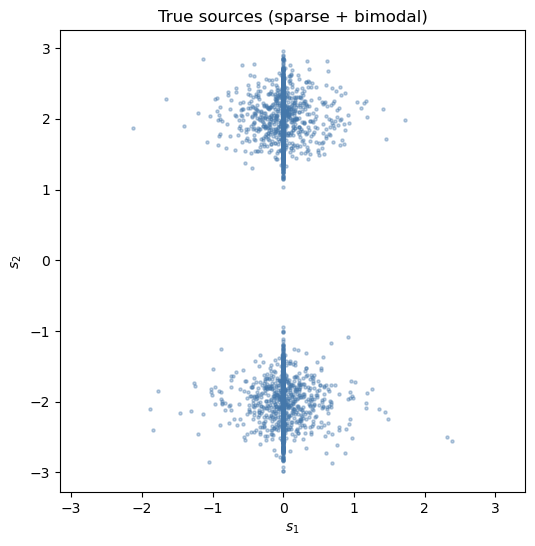

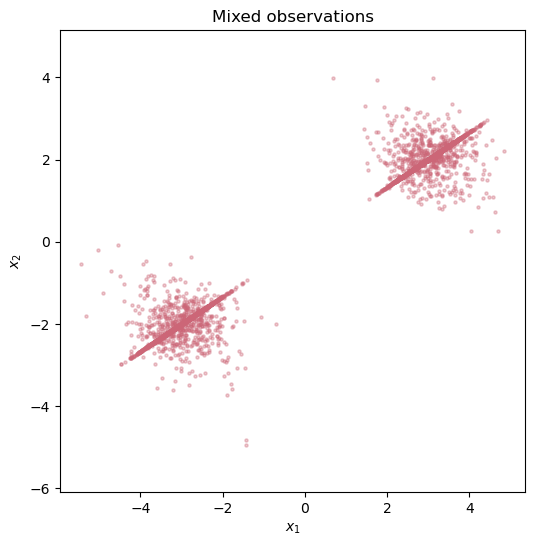

In [2]:
n_samples = 5000
sparse = rng.laplace(0, 0.3, size=n_samples)
mask = rng.random(n_samples) < 0.75
sparse[mask] = 0.0
bimodal = rng.choice([-2.0, 2.0], size=n_samples) + rng.normal(0, 0.3, size=n_samples)
S = np.column_stack([sparse, bimodal])

mixing = np.array([[1.0, 1.5], [-1.0, 1.0]])
X = (mixing @ S.T).T

plt.figure(figsize=(6, 6))
plt.scatter(S[:, 0], S[:, 1], s=5, alpha=0.35, color="#4477aa")
plt.title("True sources (sparse + bimodal)")
plt.xlabel("$s_1$")
plt.ylabel("$s_2$")
plt.axis("equal")
plt.savefig(
    os.path.join(FIG_DIR, "sources_non_gaussian.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.35, color="#cc6677")
plt.title("Mixed observations")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis("equal")
plt.savefig(
    os.path.join(FIG_DIR, "mixed_data.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()

## PCA geometry

PCA picks orthogonal directions of maximal variance, regardless of the
non-Gaussian cluster structure.

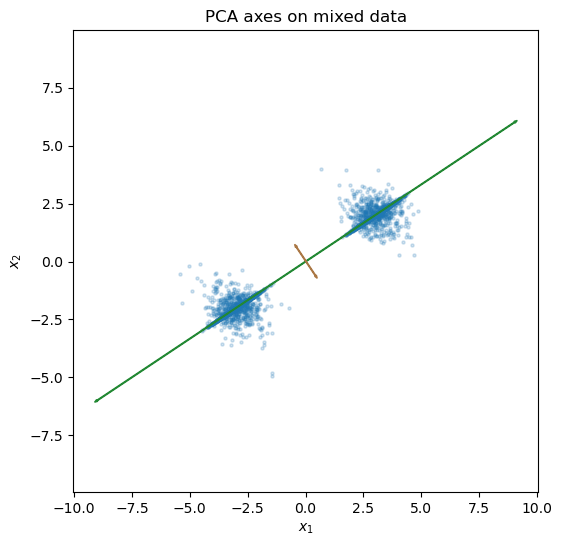

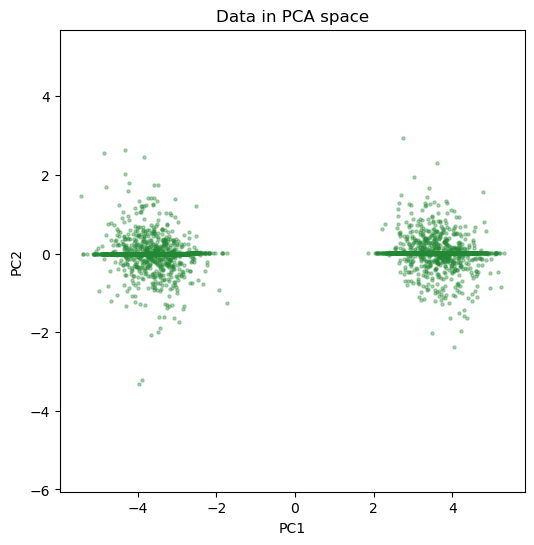

In [3]:
pca = PCA(n_components=2)
pca.fit(X)
center = X.mean(axis=0)
axes = pca.components_
scales = pca.singular_values_ / np.sqrt(X.shape[0] - 1)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.2)
for vec, scale, color in zip(axes, scales, ["#228833", "#aa7744"]):
    arrow = vec * scale * 3
    plt.arrow(
        center[0],
        center[1],
        arrow[0],
        arrow[1],
        color=color,
        width=0.03,
        length_includes_head=True,
    )
    plt.arrow(
        center[0],
        center[1],
        -arrow[0],
        -arrow[1],
        color=color,
        width=0.03,
        length_includes_head=True,
    )
plt.title("PCA axes on mixed data")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis("equal")
plt.savefig(
    os.path.join(FIG_DIR, "pca_axes.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()

X_pca = pca.transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.35, color="#228833")
plt.title("Data in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis("equal")
plt.savefig(
    os.path.join(FIG_DIR, "pca_transformed.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()

## ICA recovery

FastICA focuses on non-Gaussianity and recovers the independent directions,
which need not be orthogonal in the observation space.

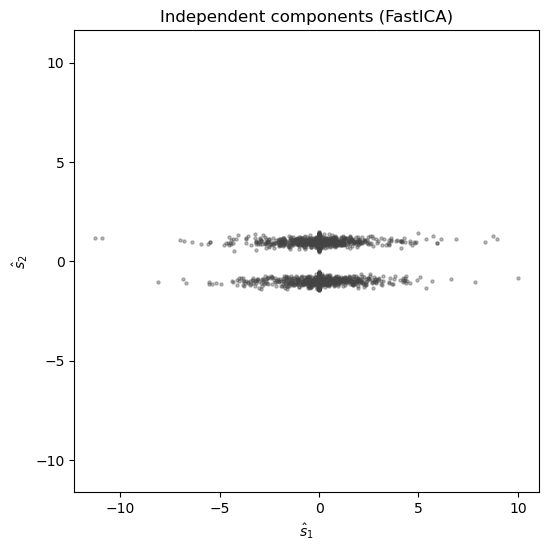

In [4]:
ica = FastICA(random_state=10, whiten="unit-variance")
S_hat = ica.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(S_hat[:, 0], S_hat[:, 1], s=5, alpha=0.35, color="#444444")
plt.title("Independent components (FastICA)")
plt.xlabel("$\\hat{s}_1$")
plt.ylabel("$\\hat{s}_2$")
plt.axis("equal")
plt.savefig(
    os.path.join(FIG_DIR, "ica_recovered.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()

## Summary

* PCA is geometry-driven: orthogonal axes sorted by variance.
* ICA is statistics-driven: separates non-Gaussian, independent sources even if
  axes are not orthogonal in the observation space.
* Visualizing both clarifies why whitening plus ICA outperforms PCA for
  non-Gaussian signals.